### Regularization from the chapter of Ian Goodfellow

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'
np.random.seed(0)

In [25]:
# Define the model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size, eta = 0.1):
        super(LinearRegression, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(input_size, 5),
            nn.Linear(5, 10),
            nn.Sigmoid(),
            nn.Linear(10, 5),
            nn.Linear(5, output_size)
        )
        self.N = torch.distributions.Normal(0, eta)
        self.eta = eta

    def forward(self, x):
        return self.linear(x)

In [26]:
x_values = np.array([np.array([i]) for i in range(1, 6)])
x = torch.tensor(x_values, dtype=torch.float32)
y_values = np.array([2 * i + 3 + 5 * (np.random.rand() - 0.5) for i in x_values])
y = torch.tensor(y_values, dtype=torch.float32)
train_data = list(zip(x, y))

In [38]:
loss_fn = nn.MSELoss().to(device=device)
learning_rate = 0.01
epochs = 20000

In [39]:
model = LinearRegression(1, 1).to(device=device)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
for epoch in range(epochs):
    y_hat = model(x)
    optimizer.zero_grad()
    loss = loss_fn(y, y_hat)
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        error = torch.linalg.norm(loss).item()
        print(f"Error for epoch {epoch + 1}: {error}")

Error for epoch 1: 90.30728149414062
Error for epoch 501: 1.4577651023864746
Error for epoch 1001: 0.8511508703231812
Error for epoch 1501: 0.1487445831298828
Error for epoch 2001: 0.07655846327543259
Error for epoch 2501: 0.04945776239037514
Error for epoch 3001: 0.030426401644945145
Error for epoch 3501: 0.015909921377897263
Error for epoch 4001: 0.018045861274003983
Error for epoch 4501: 0.026525694876909256
Error for epoch 5001: 0.016490250825881958
Error for epoch 5501: 0.009478735737502575
Error for epoch 6001: 0.006440751254558563
Error for epoch 6501: 0.003929353319108486
Error for epoch 7001: 0.0022513698786497116
Error for epoch 7501: 0.0012841725256294012
Error for epoch 8001: 0.0007953072199597955
Error for epoch 8501: 0.0004451090353541076
Error for epoch 9001: 0.0002547618933022022
Error for epoch 9501: 0.00015383437857963145
Error for epoch 10001: 9.111418330576271e-05
Error for epoch 10501: 5.230672104516998e-05
Error for epoch 11001: 2.9945022106403485e-05
Error for ep

In [42]:
model_noise = LinearRegression(1, 1,eta=0.2)
optimizer_noise = torch.optim.SGD(model_noise.parameters(), lr = learning_rate)
for epoch in range(epochs):
    optimizer_noise.zero_grad()
    y_ = model_noise(x + model_noise.N.sample(x.shape))
    y_hat = y_ + model_noise.N.sample(x.shape) * 0
    loss = loss_fn(y, y_hat)
    loss.backward()
    optimizer_noise.step()
    if epoch % 500 == 0:
        error = torch.linalg.norm(loss).item()
        print(f"Error for epoch {epoch + 1}: {error}")

Error for epoch 1: 93.6785888671875
Error for epoch 501: 1.901136040687561
Error for epoch 1001: 1.3472001552581787
Error for epoch 1501: 0.15756049752235413
Error for epoch 2001: 0.05964980274438858
Error for epoch 2501: 0.0804029107093811
Error for epoch 3001: 0.156280517578125
Error for epoch 3501: 0.012907390482723713
Error for epoch 4001: 0.33373555541038513
Error for epoch 4501: 0.05514313653111458
Error for epoch 5001: 0.09857886284589767
Error for epoch 5501: 0.21212580800056458
Error for epoch 6001: 0.10310091078281403
Error for epoch 6501: 0.01805984042584896
Error for epoch 7001: 0.06935881823301315
Error for epoch 7501: 0.019399579614400864
Error for epoch 8001: 0.10736978054046631
Error for epoch 8501: 0.25912532210350037
Error for epoch 9001: 0.08464263379573822
Error for epoch 9501: 0.005293256137520075
Error for epoch 10001: 0.03813358023762703
Error for epoch 10501: 0.13020160794258118
Error for epoch 11001: 0.10236486047506332
Error for epoch 11501: 0.0538497343659400

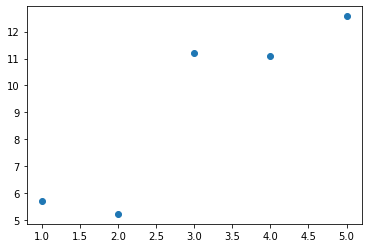

In [34]:
plt.scatter(x, y)

[]

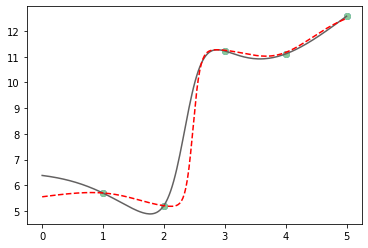

In [43]:
plt.scatter(x, y)
test_x = torch.tensor([[x] for x in np.linspace(0, 5, 200)], dtype=torch.float32)
test_y = model(test_x)
test_y_noise = model_noise(test_x)
plt.scatter(x, y, color = '#88c999')
plt.plot(test_x.transpose(-1, 0)[0].detach().numpy(), test_y.transpose(-1, 0)[0].detach().numpy(), color = "#636161")
plt.plot(test_x.transpose(-1, 0)[0].detach().numpy(), test_y_noise.transpose(-1, 0)[0].detach().numpy(), 'r--')
plt.plot()

## Result
- Here in the above plot we can see that that output for **model wihtout noise(purple)** is more sensitive to input. 
- But for **model with noise(red)**, it is less sensitive to input as it is trained with inbuilt noise.
- With increasing value of eta, we can see that the capacity of model decreases, so we can conclude that adding noise can act as a form of regularization.

In normal model, the loss function is:  
$J = E_p(x, y) [y(x) - t]$

But, in another model we add random amount of noise $\epsilon_W ~ \mathcal{N} (\mu, \eta I)$ and now the cost function becomes:  
$J = E_p(x, y, \epsilon_W) [y_{\epsilon_W}(x) - t]$